# Circumferential ROYGBIV Lines

<ul><li>Creates two circles C1 and C2 in Cartesian 2-space, each with user-defined radius and origin.</li>
    <li>Computes user-defined n1 and n2 numbers of points on the circumference of each circle.<br>Points are spaced at 2$\pi$/n intervals, sequentially, following the choice of an initial<br> random point.</li>    
    <li>Draws the least common multiple of n1 and n2 lines between successive<br>pairs c1 and c2 of circumferential points.</li></ul><br><nr>
David Morgan<br>
Winnipeg, Canada<br>
dmmorgan@gmail.com


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import random
import socket
import re

# set default directory depending on host in use
if socket.gethostname() == 'apokalite':
    basedir = '/home/david/gh/Xmas_presents/Lise'
else:
    basedir=os.getcwd()
    
os.chdir(basedir)
print(f'present directory: {basedir}')

present directory: /home/david/gh/Xmas_presents/Lise


In [2]:
def rm(theta):
    # construct rotation matrix for input theta (radians)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([c, -s, s, c]).reshape(2, 2)
    return R

def ccv(r, n, ov):
    # compute circumference vectors
    # inputs:
    # radius, number of points to compute, origin (2-vector)
    iv = r * np.array([0, 1]).reshape(-1, 1) # 'initial vector,' a colum vector
    iv = np.matmul(rm(np.random.uniform(0, 2 * np.pi, 1)), iv) # rotate it randomly 
    for i in range(n):
        theta = 2 * i * np.pi / n
        z = ov + np.matmul(rm(theta), iv) # rotate and translate 
        if i == 0:
            out = z # first column of output matrix
        else:
            out = np.hstack((out, z)) # stack columns to fill out matrix
    return out

def clse(cm1, cm2):
    # 'compute line segment extrema'
    # inputs: circumference matrices 1 and 2
    # each of which are any output of the ccv function
    cols1, cols2 = cm1.shape[1], cm2.shape[1]
    lcm = math.lcm(cols1, cols2)
    iter1, iter2 = lcm / cols1, lcm / cols2
    for i in range(int(iter1)):
        if i == 0:
            ocv1 = cm1
        else:
            ocv1 = np.hstack([ocv1, cm1])
    for i in range(int(iter2)):
        if i == 0:
            ocv2 = cm2
        else:
            ocv2 = np.hstack([ocv2, cm2])
    # lines are to be drawn between ocv1[i] and ocv2[i]
    lse = []
    for i in range(ocv1.shape[1]):
        lse.append(np.hstack([ocv1[0:, i:1+i], ocv2[0:, i:1+i]]))
    return lse

def dl(lse):
    # draw lines
    # input: any one output of the clse function
    clist = ['red','orange','yellow','green','blue','indigo','violet', 'black']
    lcl = len(clist)
    for i in range(len(lse)):
        t = lse[i].ravel()
        plt.plot([t[0],t[1]],[t[2],t[3]],color=clist[i%lcl])        
    plt.axis('equal')
    plt.axis('off')
    plt.savefig('output.png', dpi=300)
    plt.show()
    plt.close()
    return

def mkimgsdirifnotexist(basedir):
    # create an images directory at basedir
    # if it does not already exist
    imgdir = basedir+'/images'
    if not os.path.isdir(imgdir):
        os.mkdir(imgdir)
        return print(f'created directory {imgdir}')
    return print(f'directory {imgdir} exists')
        

In [3]:
# make the images directory if it doesn't exist
mkimgsdirifnotexist(basedir)

directory /home/david/gh/Xmas_presents/Lise/images exists


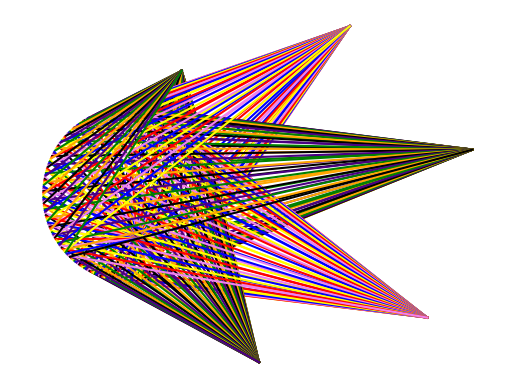

In [4]:
# make the image
# reference syntax for file naming:
# ov1[3_0]_ov2[3_6]_r1_1_2_r2_2_4_n1_300_n2_150
ov1, ov2 = [0,0], [4,0]
ov1, ov2 = np.array(ov1).reshape(-1,1), np.array(ov2).reshape(-1,1)
r1, r2 = 2, 4
n1, n2 = 360, 6
c1 = ccv(r1, n1, ov1)
c2 = ccv(r2, n2, ov2)
lse = clse(c1, c2)
dl(lse)
fn = "ov1"+str(ov1.ravel())+"_"+"ov2"+str(ov2.ravel())+"_r1_"+str(r1)+"_r2_"+str(r2)+"_n1_"+str(n1)+"_n2_"+str(n2)
fn = fn.replace(' ','_')
fn = fn.replace('.','_')
fn = fn+'.png'
fn = basedir+'/images/'+fn
#os.rename('output.png', fn)

Explore parameter space.